# [Leetcode283-移动零](https://leetcode.cn/problems/move-zeroes/?envType=study-plan-v2&envId=top-100-liked)

给定一个数组 nums，编写一个函数将所有 0 移动到数组的末尾，同时保持非零元素的相对顺序。

请注意，必须在不复制数组的情况下原地对数组进行操作。 

示例 1:
- 输入: nums = [0,1,0,3,12]
- 输出: [1,3,12,0,0]

示例 2:
- 输入: nums = [0]
- 输出: [0]

提示:
  
- $-2^{31} \leq \text{nums}[i] \leq 2^{31} - 1$
- $-2 ^ {31} $ <= nums[i] <= $2^{31} - 1$

进阶：你能尽量减少完成的操作次数吗？

```cpp
class Solution{
public:
    void moveZeroes(vector<int>& nums){
        // 使用快慢指针的思想，把不是0的都放在前面，后面补0即可
        int slow = 0;
        for (int fast = 0; fast < nums.size(); fast++) {
            if (nums[fast] != 0) {
                nums[slow] = nums[fast];
                slow += 1;
            }
        }

        for (int i = slow; i < nums.size(); i++) {
            nums[i] = 0;
        }
    }    
};

```

In [ ]:
class Solution:
    def moveZeroes(self, nums):
        slow = 0
        for num in nums:
            if num != 0:
                nums[slow] = num
                slow += 1
        for i in range(slow, len(nums)):
            nums[i] = 0


# [Leetcode11-盛最多水的容器](https://leetcode.cn/problems/container-with-most-water/?envType=study-plan-v2&envId=top-100-liked)

给定一个长度为 n 的整数数组 height 。有 n 条垂线，第 i 条线的两个端点是 (i, 0) 和 (i, height[i]) 。

找出其中的两条线，使得它们与 x 轴共同构成的容器可以容纳最多的水。

返回容器可以储存的最大水量。

说明：你不能倾斜容器。

示例 1：

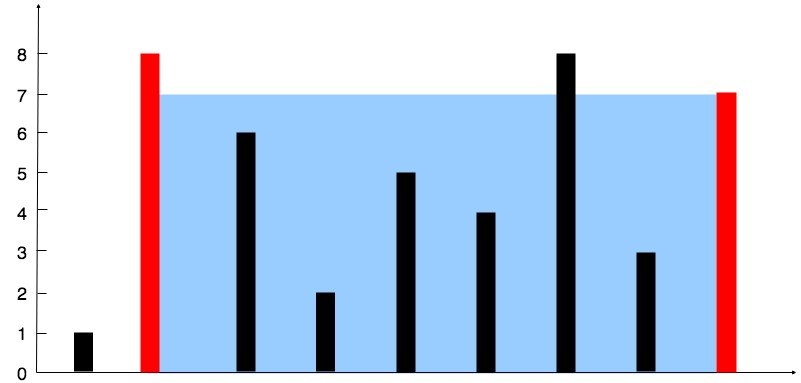
- 输入：[1,8,6,2,5,4,8,3,7]
- 输出：49 
- 解释：图中垂直线代表输入数组 [1,8,6,2,5,4,8,3,7]。在此情况下，容器能够容纳水（表示为蓝色部分）的最大值为 49。

示例 2：
- 输入：height = [1,1]
- 输出：1

提示：
- n == height.length
- 2 <= n <= $10^5$
- 0 <= height[i] <= $10^4$


```cpp
// 使用Cpp求解
class Solution{
public:
    int maxArea(vector<int>& height){
        int i = 0;
        int j = height.size() - 1;
        int res = 0;
        while (i != j) {
            int cur_height = std::min(height[i], height[j]);
            int cur_distance = j - i;
            int cur_res = cur_height * cur_distance;
            res = std::max(res, cur_res);
            if (height[i] >= height[j]) {
                j -= 1;
            }else {
                i += 1;
            }
        }
        return res;
    }
};

```

In [ ]:
class Solution:
    def maxArea(self, height):
        i = 0
        j = len(height) - 1
        res = 0
        while i != j:
            cur_height = min(height[i], height[j])
            cur_res = cur_height * (j - i)
            res = max(res, cur_res)
            if height[i] >= height[j]:
                j -= 1
            else:
                i += 1
        return res

# [Leetcode15-三数之和](https://leetcode.cn/problems/3sum/description/?envType=study-plan-v2&envId=top-100-liked)

给你一个整数数组 nums ，判断是否存在三元组 [nums[i], nums[j], nums[k]] 满足 i != j、i != k 且 j != k ，同时还满足 nums[i] + nums[j] + nums[k] == 0 。请你返回所有和为 0 且不重复的三元组。

注意：答案中不可以包含重复的三元组。


示例 1：
- 输入：nums = [-1,0,1,2,-1,-4]
- 输出：[[-1,-1,2],[-1,0,1]]
- 解释：
    1. nums[0] + nums[1] + nums[2] = (-1) + 0 + 1 = 0 。
    2. nums[1] + nums[2] + nums[4] = 0 + 1 + (-1) = 0 。
    3. nums[0] + nums[3] + nums[4] = (-1) + 2 + (-1) = 0 。
    4. 不同的三元组是 [-1,0,1] 和 [-1,-1,2] 。
    5. 注意，输出的顺序和三元组的顺序并不重要。

示例 2：
- 输入：nums = [0,1,1]
- 输出：[]
- 解释：唯一可能的三元组和不为 0 。

示例 3：
- 输入：nums = [0,0,0]
- 输出：[[0,0,0]]
- 解释：唯一可能的三元组和为 0 。

提示：

- 3 <= nums.length <= 3000
- $-10^5$ <= nums[i] <= $10^5$

```cpp
// 使用Cpp求解
// 这是一个超时的版本
class Solution{
public:
    vector<vector<int>> threeSum(vector<int>& nums){
        set<vector<int>> nums_set;
        std::sort(nums.begin(), nums.end());
        for (int i = 0; i < nums.size() - 2; i++) {
            for (int j = i + 1; j < nums.size(); j++) {
                for (int k = j + 1; k < nums.size(); k++) {
                    if (nums[i] + nums[j] + nums[k] == 0) {
                        nums_set.insert({nums[i], nums[j], nums[k]});
                    }
                }
            }
        }
        vector<vector<int>> res(nums_set.begin(), nums_set.end());
        return res;
    }
};
```

```cpp
// 这是正确的Cpp求解版本
class Solution{
public:
    vector<vector<int>> threeSum(vector<int>& nums){
        std::sort(nums.begin(), nums.end());
        vector<vector<int>> res;
        for (int i = 0; i < nums.size() - 2; i++) {
            if (i > 0 && nums[i] == nums[i - 1]){
                continue;
            }
            int left = i + 1;
            int right = nums.size() - 1;
            int target = 0 - nums[i];
            while (left < right) {
                if (nums[left] + nums[right] == target) {
                    res.push_back({nums[i], nums[left], nums[right]});
                    while (left < right && nums[left + 1] == nums[left]) left += 1;
                    while (left < right && nums[right - 1] == nums[right]) right -= 1;
                    left++;
                    right--;
                } else if (nums[left] + nums[right] < target){
                    left += 1;
                } else {
                    right -= 1;
                }
            }
        }
        return res;
    }
};
```

In [ ]:
# 这是超时的版本
class Solution:
    def threeSum(self, nums):
        nums.sort()
        n = len(nums)
        res = []
        for i in range(n - 2):
            if i > 0 and nums[i] == nums[i - 1]:
                continue
            for j in range(i + 1, n - 1):
                if j > i + 1 and nums[j] == nums[j - 1]:
                    continue
                for k in range (j + 1, n):
                    if k > j + 1 and nums[k] == nums[k - 1]:
                        continue
                    if nums[i] + nums[j] + nums[k] == 0:
                        res.append([nums[i], nums[j], nums[k]])
        return res

In [ ]:
# 这是正确的版本
class Solution:
    def threeSum(self, nums):
        n = len(nums)
        nums.sort() # 排序去重
        res = []
        for i in range(n - 2):
            # 为了去重
            if i > 0 and nums[i] == nums[i - 1]:
                continue
            left = i + 1
            right = n - 1
            target = 0 - nums[i]
            while left < right:
                if nums[left] + nums[right] == target:
                    res.append([nums[i], nums[left], nums[right]])
                    # 后面是为了去重，注意这里的条件，很重要
                    while left < right and nums[left + 1] == nums[left]:
                        left += 1
                    while left < right and nums[right - 1] == nums[right]:
                        right -= 1
                    left += 1
                    right -= 1
                elif nums[left] + nums[right] < target:
                    left += 1
                else:
                    right -= 1
        return res
                    
                    
                    


# [Leetcode42-接雨水](https://leetcode.cn/problems/trapping-rain-water/description/?envType=study-plan-v2&envId=top-100-liked)

给定 n 个非负整数表示每个宽度为 1 的柱子的高度图，计算按此排列的柱子，下雨之后能接多少雨水。

示例 1:
- 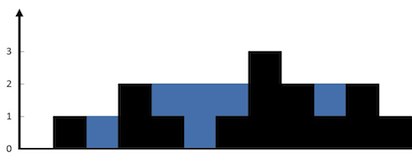
- 输入：height = [0,1,0,2,1,0,1,3,2,1,2,1]
- 输出：6
- 解释：上面是由数组 [0,1,0,2,1,0,1,3,2,1,2,1] 表示的高度图，在这种情况下，可以接 6 个单位的雨水（蓝色部分表示雨水）。 

示例 2：
- 输入：height = [4,2,0,3,2,5]
- 输出：9

提示：
- n == height.length
- 1 <= n <= $2 * 10^4$
- 0 <= height[i] <= $10^5$

```cpp
// 使用Cpp的解法
class Solution{
public:
    int trap(vector<int>& height){
        int left = 0;
        int right = height.size() - 1;
        int leftMax = 0;
        int rightMax = 0;
        int res = 0;
        while (left < right) {
            leftMax = std::max(height[left], leftMax);
            rightMax = std::maxA(height[right], rightMax);
            if (height[left] < height[right]) {
                res += leftMax - height[left];
                ++left;
            }
            else {
                res += rightMax - height[right];
                --right;
            }
        }
        return res;
    }
};
```

In [ ]:
# 使用Py的解法
class Solution:
    def trap(self, height):
        left = 0
        right = len(height) - 1
        leftmax = 0
        rightmax = 0
        res = 0
        while left < right:
            leftmax = max(height[left], leftmax)
            rightmax = max(height[right], rightmax)
            if height[left] < height[right]:
                res += leftmax - height[left]
                left +=1
            else:
                res += rightmax - height[right]
                right -= 1
        return res

               